##Titanic Survival Predictions

#Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [14,8]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.style.use('seaborn-whitegrid')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Read and Explore Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train (2).csv to train (2) (2).csv
Saving test (2).csv to test (2) (2).csv


In [ ]:
train = pd.read_csv('train (2).csv')
test = pd.read_csv('test (2).csv')
print("The number of rows and columns in the training dataset are:",train.shape)
print("The number of rows and columns in the testing dataset are:",test.shape)

train.head()

The number of rows and columns in the training dataset are: (891, 12)
The number of rows and columns in the testing dataset are: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Data Analysis

In [ ]:
#Get a list of the features within the dataset
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
#see a sample of the dataset to get an idea of the variables
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0000,NaN,S
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S
691,692,1,3,"Karun, Miss. Manca",female,4.0,0,1,349256,13.4167,NaN,C


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

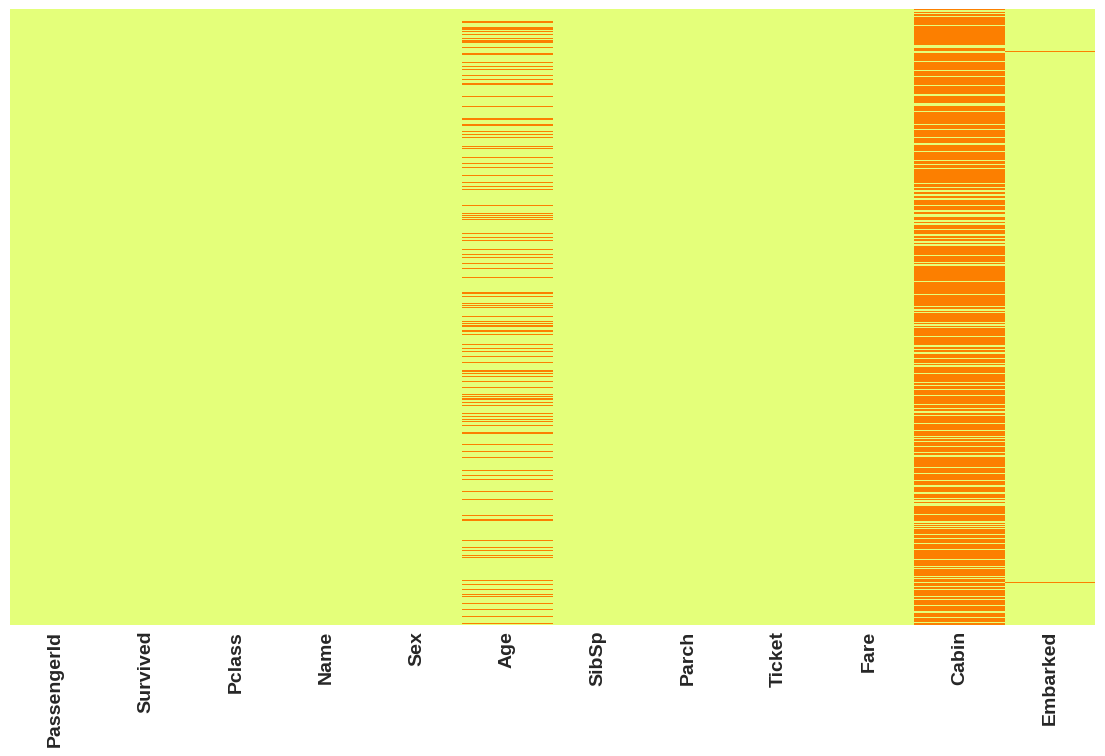

In [ ]:
#check for missing values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='Wistia')

About 20% of the age data is missing and since age is important to predict whether the person survived we will fill the missing values,and since most of the values in the cabin feature are missing it would be meaningless to fill those values so we will drop the feature altogether

<Axes: >

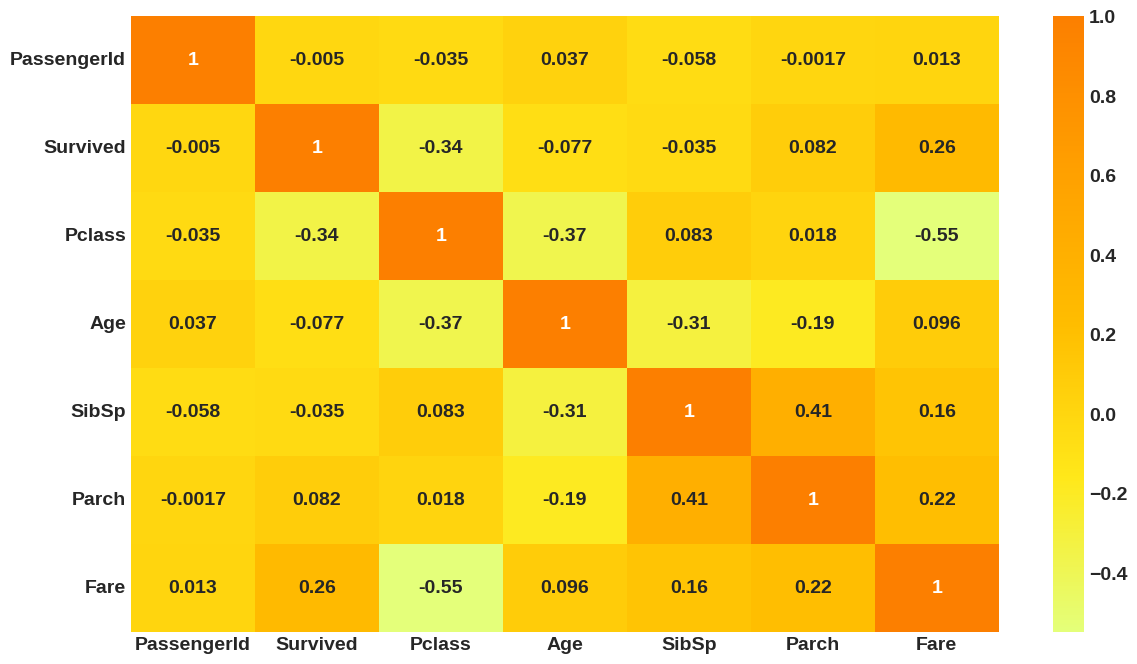

In [ ]:
corr = train.corr(numeric_only = True)
sns.heatmap(corr, cmap = 'Wistia',annot = True)

<Axes: xlabel='Survived', ylabel='count'>

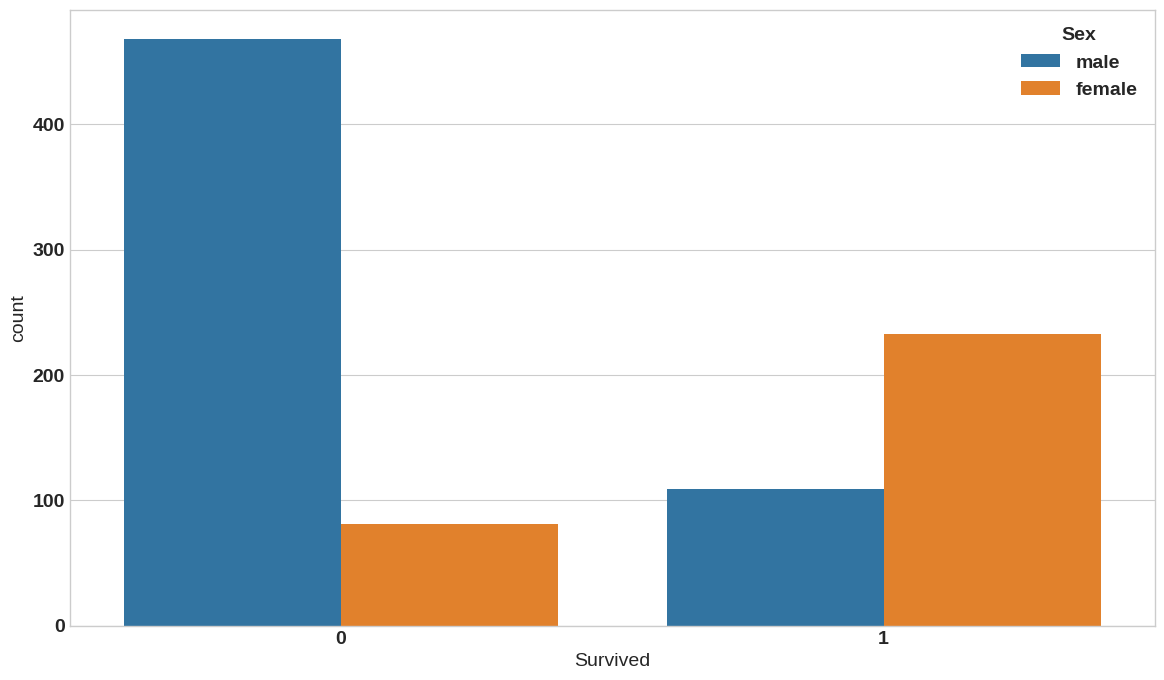

In [ ]:
sns.countplot(data=train,x='Survived',hue='Sex')

From this we can infer that, the ratio of Female to Male survival is greater compared to the ratio of Male to Female survival

<Axes: xlabel='Survived', ylabel='count'>

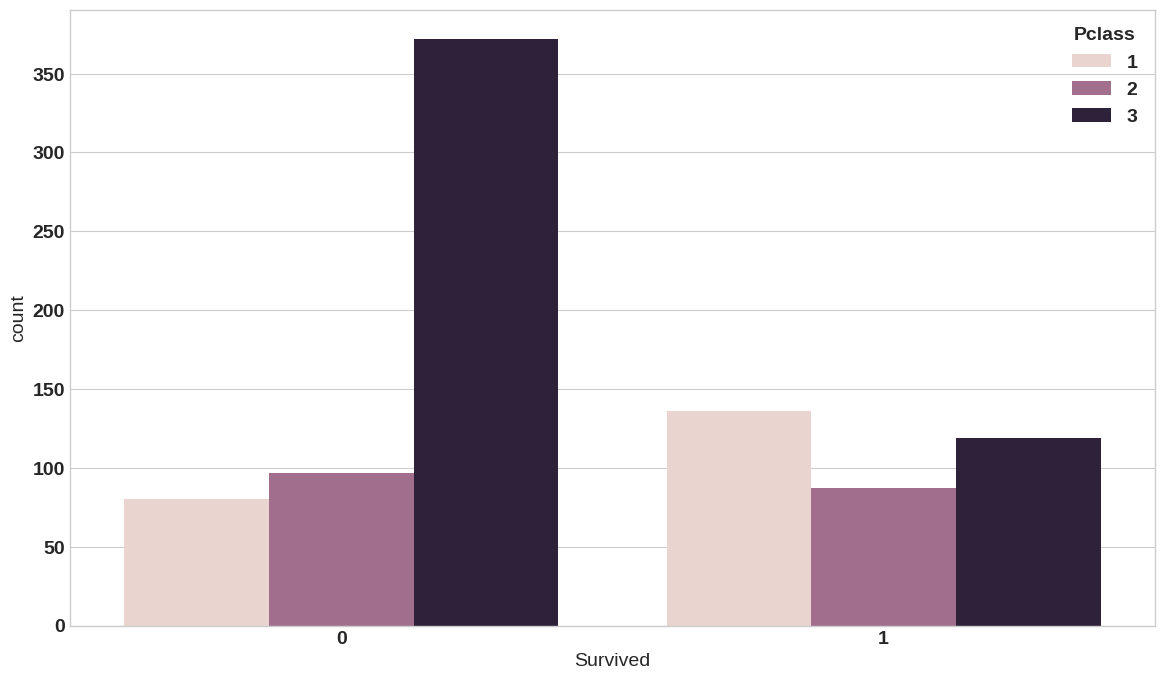

In [ ]:
sns.countplot(data=train,x='Survived',hue='Pclass')

From this plot we see that people belonging to passenger class 3 are more likely to survive compared to people of passenger class 1. This is likely due to difference in Fares between class 1 and 3 resulting in priorities.



Text(0.5, 1.0, 'Survived vs Parent/Children Count')

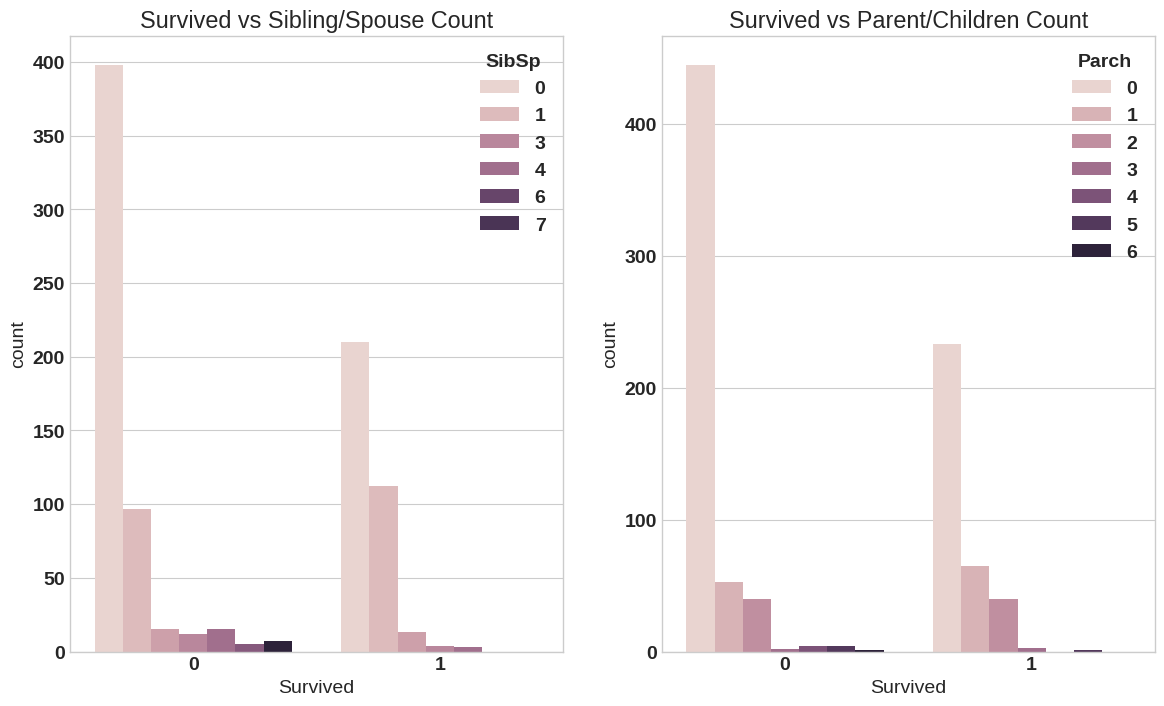

In [ ]:
f = plt.figure(figsize=(14,8))
ax = f.add_subplot(121)
sns.countplot(data=train,x='Survived',hue='SibSp')
ax.set_title('Survived vs Sibling/Spouse Count')
ax = f.add_subplot(122)
sns.countplot(data=train,x='Survived',hue='Parch')
ax.set_title('Survived vs Parent/Children Count')

Text(0.5, 1.0, 'Fare Distribution')

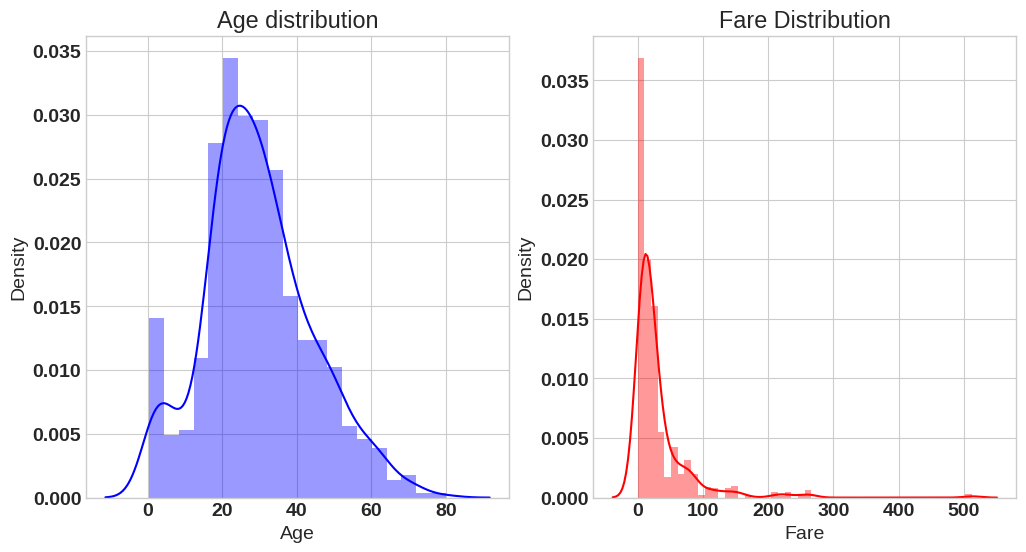

In [ ]:
f = plt.figure(figsize=(12,6))
ax = f.add_subplot(121)
sns.distplot(train['Age'],color='blue')
ax.set_title('Age distribution')
ax = f.add_subplot(122)
sns.distplot(train['Fare'],color='red')
ax.set_title('Fare Distribution')

As we can see from this plot, the distribution for Age is fairly normal whereas the distribution for Fare is right skewed, this indicates outliers which might be the high fare prices of the passenger class 3

Text(0.5, 1.0, 'Fare vs Passenger Class')

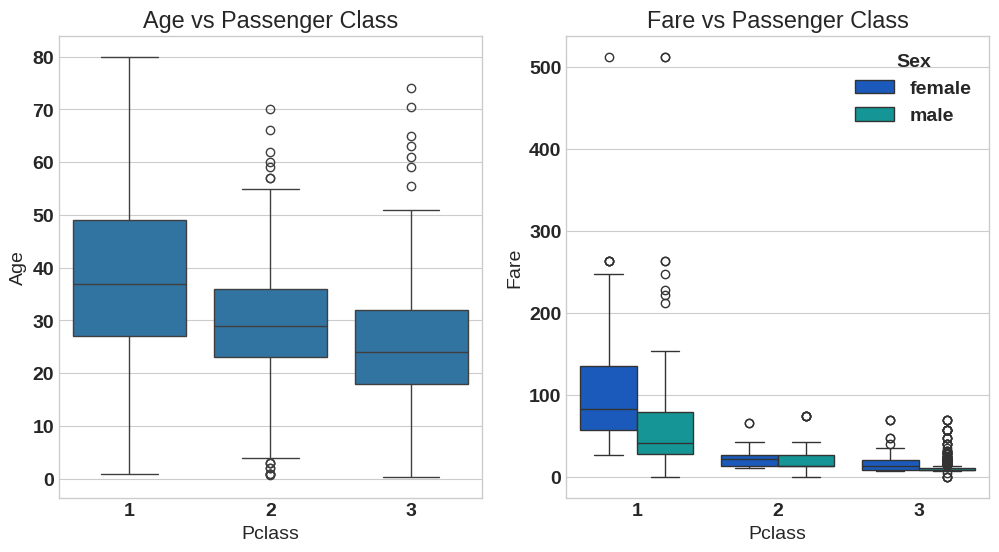

In [ ]:
f = plt.figure(figsize=(12,6))
ax = f.add_subplot(121)
sns.boxplot(data=train,x='Pclass',y='Age',ax=ax)
ax.set_title('Age vs Passenger Class')
ax = f.add_subplot(122)
sns.boxplot(data=train,x='Pclass',y='Fare',hue='Sex',palette='winter')
ax.set_title('Fare vs Passenger Class')

In [ ]:
train['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


<Axes: xlabel='Survived', ylabel='count'>

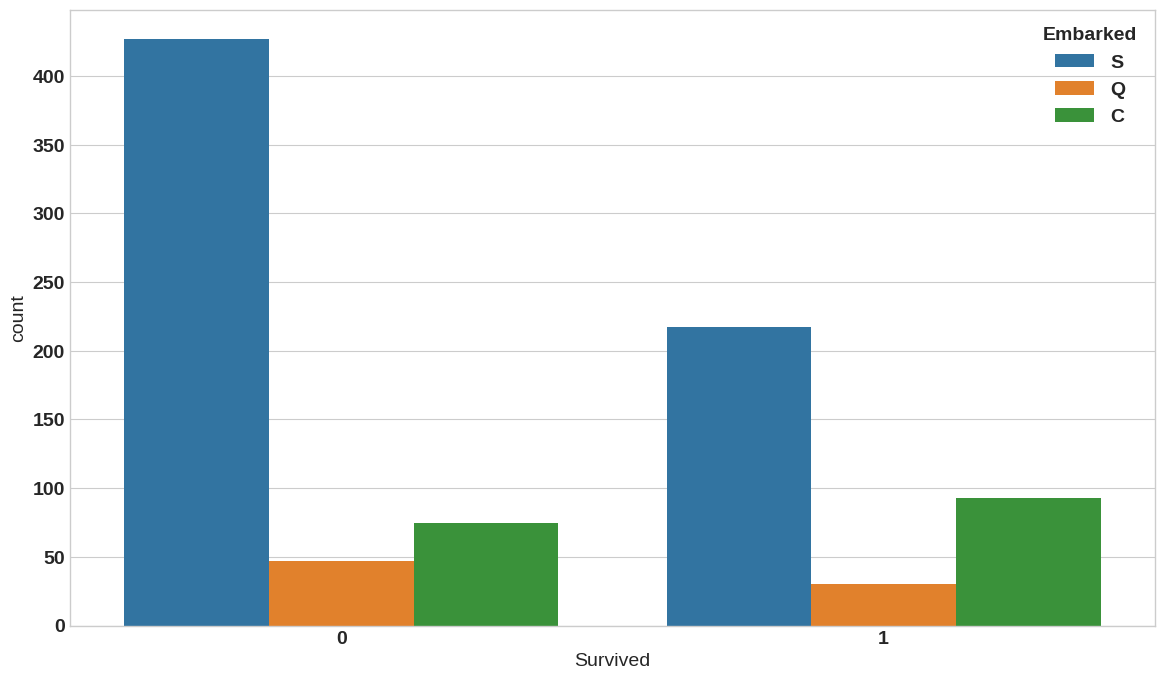

In [ ]:
#Survived vs Embarked
sns.countplot(data=train,x='Survived',hue='Embarked')

#Filling in the missing values

In [ ]:
mean_age1 = train[train['Pclass'] == 1]['Age'].mean()
mean_age2 = train[train['Pclass'] == 2]['Age'].mean()
mean_age3 = train[train['Pclass'] == 3]['Age'].mean()

In [ ]:
def age_class(cols):
    age = cols[0]
    pclass = cols[1]

    if pd.isnull(age):
      if pclass == 1:
        return mean_age1
      elif pclass == 2:
        return mean_age2
      else:
        return mean_age3
    else:
      return age

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(age_class,axis=1)

In [ ]:
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
train['Embarked'].fillna('S',inplace=True)

<Axes: >

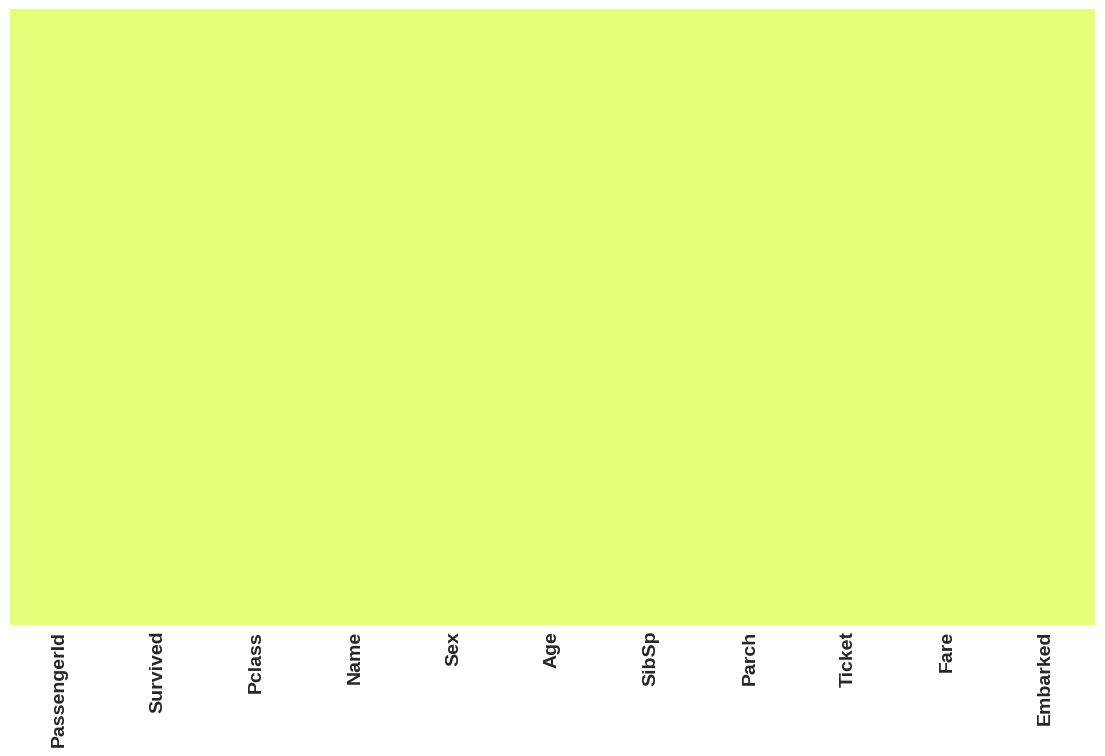

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='Wistia')

#Converting Categorical Features

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
train.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [ ]:
train = pd.concat([train,sex,embark],axis=1)

In [ ]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [ ]:
train['male'] = train['male'].astype(int)
train['S'] = train['S'].astype(int)
train['Q'] = train['Q'].astype(int)

<Axes: xlabel='Fare', ylabel='Density'>

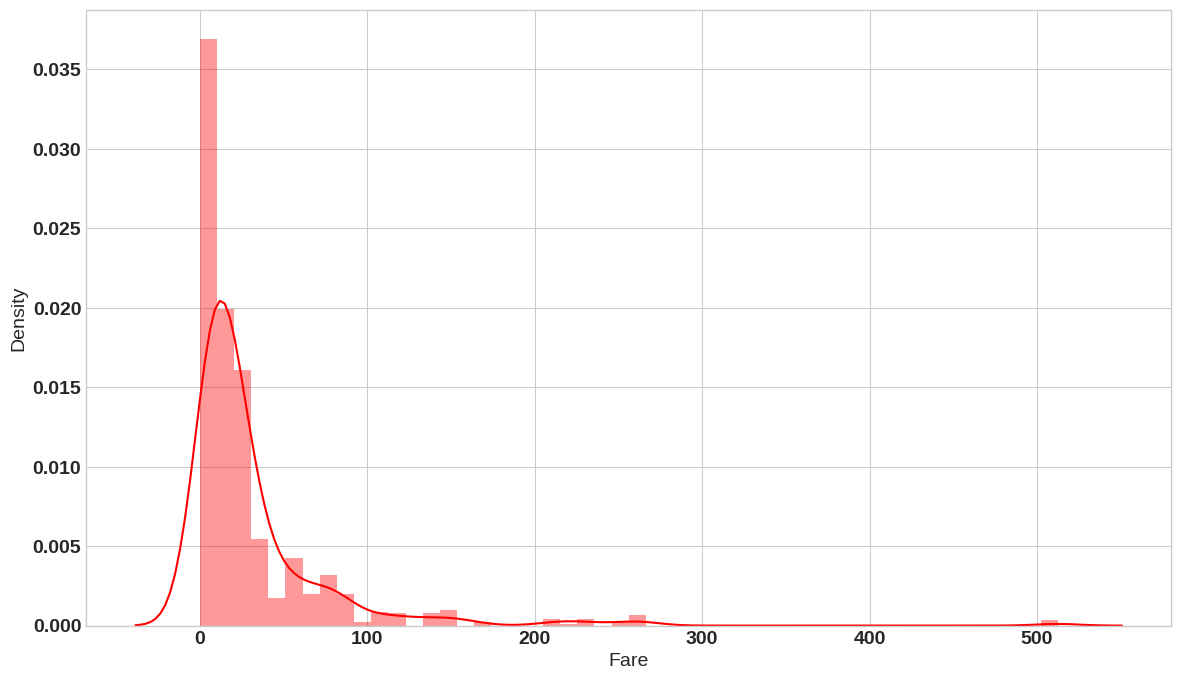

In [ ]:
sns.distplot(train['Fare'],color='red')

In [ ]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#Building a Logistic Regression Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.25,random_state=45)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       145
           1       0.75      0.77      0.76        78

    accuracy                           0.83       223
   macro avg       0.81      0.82      0.81       223
weighted avg       0.83      0.83      0.83       223

[[125  20]
 [ 18  60]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction))

0.8295964125560538
